# Examen Sympy 07/01/19

# Naam: De Witte

# Voornaam: Hélène

## Algemene instructies


1. Verander de naam van dit werkblad in 'Sympy_Examen070119_VoornaamNaam' via File -> Rename (waarbij op de plaats van 'VoornaamNaam' je eigen voornaam en naam komen te staan). Vul ook je naam en voornaam in hierboven.
2. **Sla je werkblad regelmatig op!**
3. Aan het einde van het examen zul je het .ipynb-bestand (het werkblad zelf) moeten indienen op de Toledopagina van Calculus 1 via Assignments -> Sympy-evaluatie 07/01/19. Je hebt maar 1 kans om op Submit te klikken. Zorg er dus voor dat je het juiste bestand hebt opgeladen vooraleer je definitief indient!

Veel succes!

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display

sp.init_printing()
%matplotlib notebook

# 1. Gravitationele Potentiaal en Lagrange Punten (4pt)
Wanneer twee hemellichamen (bijvoorbeeld de aarde en de zon, of twee sterren) rond een gezamenlijk zwaartepunt draaien, bestaan er vijf zogenaamde *Lagrange punten*. In deze punten zijn alle orbitale krachten in balans, waardoor bijvoorbeeld een ruimtestation of satelliet een vaste, relatief stabiele positie kan behouden ten opzichte van de twee hemellichamen. De geplande James Webb Space Telescope zal bijvoorbeeld geplaatst worden in het tweede zon-aarde Lagrange $L_2$ punt.

In deze vraag beschouwen we een "lichte" ster met massa 2 een een "zwaardere" ster met massa 10 die rond een gezamenlijk zwaartepunt draaien. Deze sterren liggen een afstand $R = 2$ uit elkaar. Het $L_1$ Lagrange punt is gedefinieerd als de oplossing van de volgende 5de-graads vergelijking:

$$ -12r^5 + 26Rr^4 - 16R^2r^3 + 10R^3r^2 - 20R^4r + 10R^5 = 0 $$

**Vraag 1**: Los deze vergelijking op naar $r$ met SymPy, en toon de oplossing.

In [2]:
r, R = sp.symbols('r R')
f = sp.Function('f')
f = -12*r**5  + 26*R*r**4 -16*R**2*r**3 +10*R**3*r**2 -20*R**4*r+10*R**5
f1 = f.subs(R,2)
uitdr = sp.solve(f1,r)
display(uitdr)

**Vraag 2:** SymPy kan duidelijk geen simpele, analytische oplossing vinden voor deze vergelijking. Laat deze oplossing dus numeriek evalueren, en toon aan dat er maar 1 reële oplossing bestaat voor $r$. In het vervolg zullen we met deze oplossing verder rekenen. Indien het bepalen van de oplossing niet lukt, neem dan $r = 1.32$ (dit is een benadering van de werkelijke oplossing).

In [3]:
a = sp.nsolve(f1,0)
display(a)

**Vraag 3:** De oplossing die je zonet bepaald hebt geeft de afstand $r$ weer tussen de "lichte" ster en het eerste Lagrange punt. De $x$-coordinaat van het $L_1$ punt wordt bijgevolg gegeven door

$$L_1 = -\frac{1}{6}R + r $$

Bepaal dus $L_1$.

In [14]:
r,R = sp.symbols('r R')
l =sp.Function('l')
l = -1/6*R+r
opl1 = l.subs(R,2)
L1 = opl1.subs(r,a)
display(L1)

Nu je de $x$-coordinaat van het Lagrange $L_1$ punt berekent hebt, gaan we over naar het plotten van de gravitationele potentiaal. Deze is gedefinieerd als de combinatie van zwaartekracht en rotatie-effecten, volgens

$$V(r, \phi) = -\frac{1}{2}\omega^2r^2 - \frac{2}{\sqrt{r^2 + R_c^2 - 2rR_c\cos\phi}} - \frac{10}{\sqrt{r^2 + R_\ast^2 + 2rR_\ast\cos\phi}} $$

waarbij $$ R_c = \frac{5}{6}R, ~~~~~~~~ R_\ast = \frac{1}{6}R ~~~~~~~~\text{en} ~~~~~~~~ \omega^2 = \frac{12}{R^3} $$


**Vraag 4:** Definieer een methode die deze potentiaal berekent voor een gegeven $x, y$ in Cartesische coordinaten. Gebruik de numpy definities voor de standaard wiskundige functies (zoals `sqrt`, `cos` etc.). In een vervolgvraag kunnen we dan eenvoudig deze functies evalueren in (lijsten van) waarden.

In [10]:
r, phi = sp.symbols('r phi')
def berekening (x,y):
    r, phi = sp.symbols('r phi')
    def afstand (x,y):
        r = np.sqrt(x**2 + y**2)
        return r
    r= afstand(x,y)
    
    def hoek(x,y):
        phi = np.arctan2(y, x)
        return phi
    phi = hoek(x,y)
    
    Z = sp.Function('V')
    
    def potentiaal(r,phi):
        R = 2
        Rc = 5/6*R
        Rster = 1/6*R
        w = np.sqrt(12/R**3)
        V= -(1/2)*(w**2)*(r**2)-(2/(np.sqrt(r**2+Rc**2-2*r*Rc*np.cos(phi)))) -(10/(np.sqrt(r**2 + Rster**2 +2*r*Rster*np.cos(phi))))
        return V
                                                                             
                                                                             
    V = potentiaal(r,phi)
    return V

**Vraag 5:** Definieer nu een meshgrid, waarbij zowel $x$ als $y$ lopen van -3.5 tot 3.5. Bereken vervolgens de potentiaal aan de hand van de methode die je zonet gedefinieerd hebt, waarbij je het meshgrid als argumenten meegeeft.

In [11]:
#meshgrid is lijst van combinaties x en y waardes
x = np.linspace(-3.5,3.5,100)
y = np.linspace(-3.5,3.5,100)
X,Y = np.meshgrid(x,y)
Z= berekening(X,Y)
display(Z)
        

array([[-20.81415831, -20.4710994 , -20.13573887, ..., -20.12773748,
        -20.46387643, -20.80767335],
       [-20.47242021, -20.13015252, -19.79560591, ..., -19.78769805,
        -20.12306298, -20.46610401],
       [-20.13848223, -19.79703297, -19.4633292 , ..., -19.45556265,
        -19.7901251 , -20.13238314],
       ...,
       [-20.13848223, -19.79703297, -19.4633292 , ..., -19.45556265,
        -19.7901251 , -20.13238314],
       [-20.47242021, -20.13015252, -19.79560591, ..., -19.78769805,
        -20.12306298, -20.46610401],
       [-20.81415831, -20.4710994 , -20.13573887, ..., -20.12773748,
        -20.46387643, -20.80767335]])

**Vraag 6:** Maak vervolgens een contourplot met matplotlib, waarbij je 50 levels neemt tussen -12 en -8. Vergeet niet de figuur een titel te geven, en de assen te benoemen. Plot vervolgens het eerste Lagrange punt in het rood op deze figuur, als je weet dat $L_1$ op de as $y=0$ ligt. Tenslotte plot je de lichte ster met een gele bol van grootte 10, en de zware ster met een gele bol van grootte 25. De coördinaten worden gegeven door $(\frac{5}{3}, 0)$ en $(-\frac{1}{3}, 0)$, respectievelijk.

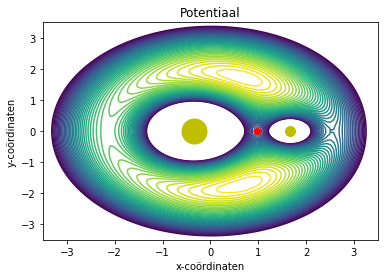

In [15]:
N = np.linspace(-12,-8,50)
X,Y = np.meshgrid(x,y)
R= 2
Rc = 5/6*R
Rster = 1/6*R
w = np.sqrt(12/R**3)
r = (X**2 + Y**2)**0.5
phi = np.arctan2(Y, X)
Z = -(1/2)*(w**2)*(r**2)-(2/(np.sqrt(r**2+Rc**2-2*r*Rc*np.cos(phi)))) -(10/(np.sqrt(r**2 + Rster**2 +2*r*Rster*np.cos(phi))))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(L1,0, "or")
ax.plot(5/3,0, "oy", markersize=10)
    
ax.plot(-1/3,0, "oy", markersize=25)
plt.contour(X,Y,Z,N)

ax.set_title('Potentiaal')
ax.set_xlabel('x-coördinaten')
ax.set_ylabel('y-coördinaten')
plt.show()

# 2. Plateaucurves (6pt)
Plateaucurves zijn genoemd naar de belgische natuur- en wiskundige Joseph Plateau. Ze worden bepaald in parametervorm door de vergelijkingen

$$f(t) = \frac{\sin((1+k)\cdot t)}{\sin((1-k)\cdot t)} ~~~~~~ \text{en} ~~~~~~ g(t) = \frac{2\sin(t)\sin(kt)}{\sin((1-k) \cdot t)} $$

waarbij $k \in [-1, 1[$.

Voer onderstaand blok code uit.

In [16]:
t, k, g,h, Y1, Y2,y,y2, x, x2,t1,h, a5, a6,e,p,y8,y9 = sp.symbols("t k g h Y1 Y2 y y2 x x2 t1 h a5 a6 e p y y1" )

**Vraag 1:** Definieer de functies $f(t)$ en $g(t)$.

In [17]:
f = sp.Function('f')
g = sp.Function('g')
f = sp.sin((1+k)*t)/(sp.sin((1-k)*t))
g = 2*sp.sin(t)*sp.sin(k*t)/(sp.sin((1-k)*t))

**Vraag 2**: Toon aan dat de $x$-as een symmetrie-as is van de kromme beschreven door deze parametervoorstelling.

In [18]:
a = f.subs(t,t)-f.subs(t,-t)
b = g.subs(t,t)+ g.subs(t,-t)
display(a)
display(b)

**Vraag 3:** We beschouwen het geval $k = \frac{1}{3}$. Maak via Sympy twee plots, waarbij je $f(t)$ in het eerste venster plot en $g(t)$ in het tweede. Uit de plots moet duidelijk blijken dat de functies $f$ en $g$ voor deze $k$ een periode van $3\pi$ hebben.

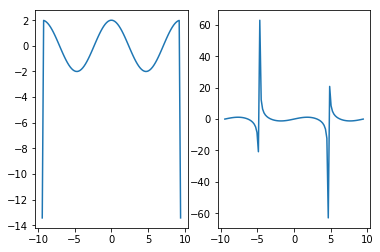

In [19]:
f = f.subs(k,1/3)
g = g.subs(k,1/3)
T = np.linspace(-3*np.pi,3*np.pi,100)
Y1 = sp.lambdify(t,f,"numpy")(T)
Y2 = sp.lambdify(t,g,"numpy")(T)
fig,ax = plt.subplots(1,2)
ax[0].plot(T,Y1)
ax[1].plot(T,Y2)
plt.show()


**Vraag 4:** Bereken vervolgens de rechter- en linkerlimieten van $f$ en $g$ als $t \rightarrow 3\pi/2$.

In [20]:
y8 = sp.limit(sp.sin((1+1/3)*t)/(sp.sin((1-1/3)*t)) ,t, 3/2*sp.pi, '-')
y9 = sp.limit(sp.sin((1+1/3)*t)/(sp.sin((1-1/3)*t)), t, 3/2*sp.pi, '+')
display(y8)
display(y9)

**Vraag 5:** Voor deze $k$ heeft de kromme een lus en een verticale asymptoot. Toon deze figuur in een vierkante box met $x \in [-4, 4]$, voor $t \in [-\pi, 2\pi]$.

1. Plot de grote lus in het blauw.
2. Plot het deel met de asymptoot in een zwarte stippellijn.
3. Plot de verticale asymptoot in het grijs.
4. Plot de snijpunten met de x-as met een rode bol.
5. Plot de x- en y-assen met een zwarte stippellijn met breedte 0.5.

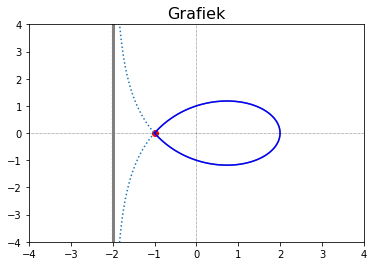

In [25]:
t = np.linspace(-np.pi, np.pi, 100)
t1 = np.linspace(np.pi, 2*np.pi, 100)
k = 1/3
x = np.sin((1+k)*t)/(np.sin((1-k)*t))
x1 = np.sin((1+k)*t1)/(np.sin((1-k)*t1))
y = 2*np.sin(t)*np.sin(k*t)/(np.sin((1-k)*t))
y1 = 2*np.sin(t1)*np.sin(k*t1)/(np.sin((1-k)*t1))
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'grey')
ax.plot(x1, y1, ':')
ax.plot(x,y, 'b')
ax.scatter(-1,0, color = "r")
# plt.scatter(2,0, color = "r") # Dit is geen nulpunt, want g is bij deze waarde niet gedefinieerd 
#(lim t=> 0 g(t) = 0, maar g(0) bestaat niet)
ax.axhline(y = 0, linewidth=0.5, linestyle = ":", color = "black")
ax.axvline(x =0, linewidth=0.5, linestyle = ":", color = "black" )

ax.axvline(x =-2, linewidth=3, color = "grey" )

ax.set_xlim(-4, 4)
ax.set_title('Grafiek', fontsize=16)
ax.set_ylim(-4, 4)
plt.show()



**Vraag 6**: Bereken de oppervlakte ingesloten door de blauwe lus.

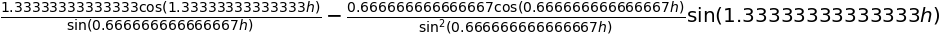

In [45]:
a5 = sp.diff((sp.sin((1+k)*h)/(sp.sin((1-k)*h))),h)
display(a5)
a6 = 2*sp.sin(h)*sp.sin(k*h)/(sp.sin((1-k)*h))

In [47]:
e = sp.Integral(a5*a6, (h,sp.pi, 2*sp.pi))

sp.N(e.as_sum(50, 'midpoint'))